In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('D:/Data_Science/Advance_Python/day 13,14/telecom_churn_clean.csv')

In [3]:
data.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


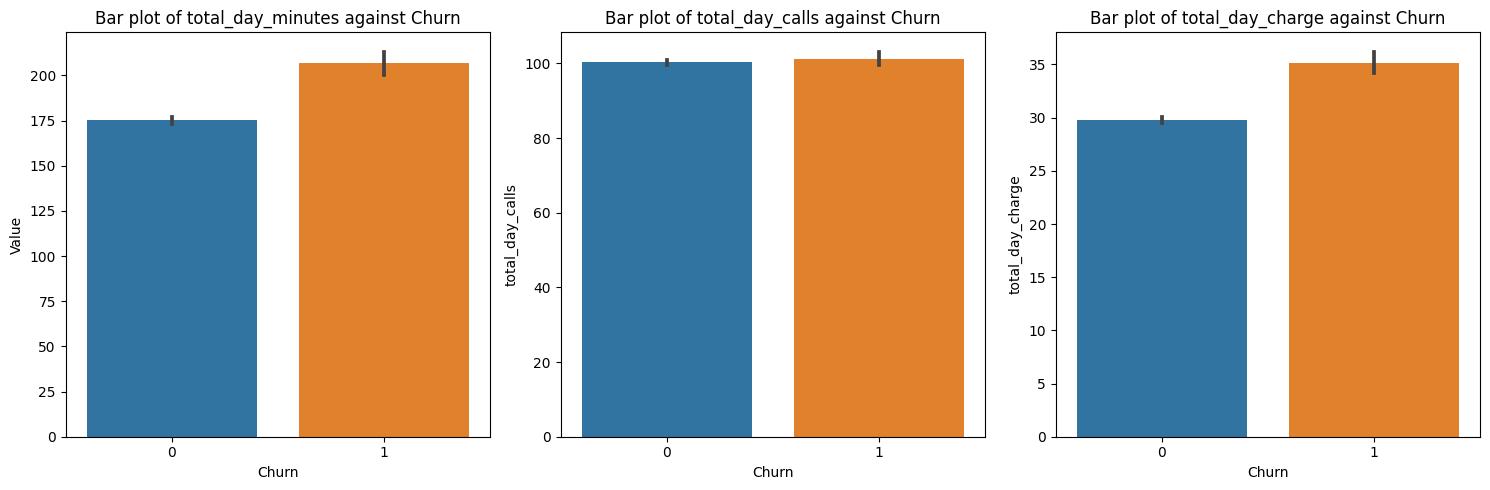

In [6]:
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
lst = ['total_day_minutes', 'total_day_calls', 'total_day_charge']
for i, var in enumerate(lst):
    sns.barplot(x='churn', y=var, data=data, ax=axes[i])
    axes[i].set_title(f'Bar plot of {var} against Churn')
axes[0].set_ylabel('Value')

for ax in axes:
    ax.set_xlabel('Churn')
    
plt.tight_layout()
plt.show()

In [7]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]  # the person who close their contract with company in giiven period of time

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 45, test_size = 0.2)

In [9]:
parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [1, 2, 3, 4, 5, 6],
    'max_features': ['auto', 'sqrt', 'log2'], 
    'splitter': ['best', 'random']
}

In [10]:
from sklearn.tree import DecisionTreeClassifier   # used for classification tree base algo
from sklearn.model_selection import GridSearchCV  # usued for selecting best combination of hyperparameter for ML algo
classifier = DecisionTreeClassifier() 
cv = GridSearchCV(classifier, param_grid = parameters, cv = 5, scoring = 'accuracy')

In [11]:
cv.fit(X_train, y_train)

c:\users\a-tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\a-tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\a-tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\users\a-tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\base

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [12]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [13]:
classifier = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, max_features = 'sqrt', splitter = 'best')

In [14]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features='sqrt')

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import classification_report

In [17]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       623
           1       0.37      0.80      0.50        44

    accuracy                           0.90       667
   macro avg       0.68      0.85      0.72       667
weighted avg       0.94      0.90      0.91       667

